### Querying and visualizing BigQuery data

In this section of the tutorial, you create a Google Cloud Datalab notebook used to query and visualize data in BigQuery. You create visualizations using the data in the natality sample table. All queries in this tutorial are in standard SQL syntax.

BigQuery commands are invoked using the escape sequence %%bq, which instructs the session to treat the content of the cell as something other than Python. 

In [9]:
%%bq query
#SQL query to return total births by year
SELECT CAST(source_year AS string) AS year, COUNT(is_male) AS birth_count
FROM `publicdata.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

year,birth_count
2008,4255156
2007,4324008
2006,4273225
2005,4145619
2004,4118907
2003,4096092
2002,4027376
2001,4031531
2000,4063823
1999,3963465


Notice the query job details appear below the query results. The details include the query processing time, the amount of data processed, and the job ID.

In next query, the --name flag is added. This query object can then be passed to a chart by referencing the name, and the chart will execute the contained query.

In [16]:
%%bq query --name total_births
#SQL query to return total births by year
SELECT CAST(source_year AS string) AS year, COUNT(is_male) AS birth_count
FROM `publicdata.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

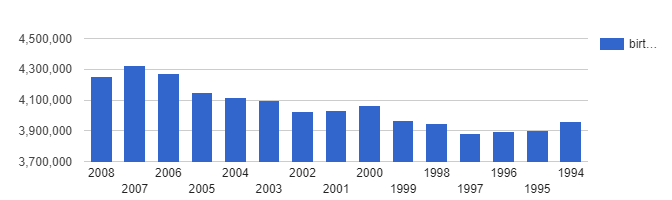

In [19]:
%chart columns --data total_births --fields year,birth_count

following querey retrieves the number of births by weekday

In [20]:
%%bq query --name births_by_weekday
SELECT CAST(wday AS string) AS weekday, 
SUM(CASE WHEN is_male THEN 1 ELSE 0 END) AS male_births, 
SUM(CASE WHEN is_male THEN 0 ELSE 1 END) AS female_births
FROM `publicdata.samples.natality`
WHERE wday IS NOT NULL
GROUP BY weekday
ORDER BY weekday ASC

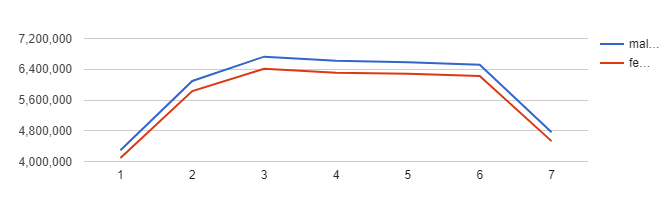

In [22]:
%chart line --data births_by_weekday --fields weekday,male_births,female_births